In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

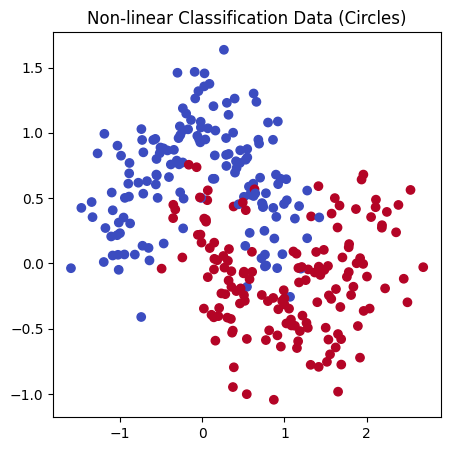

In [17]:
from sklearn.datasets import make_moons


# Two interleaving circles
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.title("Non-linear Classification Data (Circles)")
plt.show()


In [22]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build model
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=2, kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))  # for binary classification

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.get_weights()

[array([[-0.06803584, -0.02638728, -0.8126904 ,  0.14655797, -0.10640159,
         -0.22549398, -1.2005136 ,  1.4782794 ,  0.7465618 ,  0.55776197],
        [ 0.14826089, -0.78223336,  0.44154754,  0.85429394, -0.9579586 ,
          0.06747091, -0.2544958 ,  2.2285573 , -0.72325647, -0.24610671]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.19099027, -0.21075444, -0.03887374,  0.0973472 , -0.4115596 ,
         -0.4015093 ,  0.2646441 , -0.9081284 , -0.17898774, -0.9545375 ],
        [-0.4412604 , -0.02000193,  0.42129207, -0.4071204 , -0.25502136,
          0.9186564 , -0.9040794 ,  0.4109776 ,  0.41290864, -0.8423565 ],
        [-0.06234422, -0.21774267,  0.2800944 ,  0.04351132, -0.01113011,
          0.07912914,  0.01973599,  0.3002321 , -0.04765623, -0.26006502],
        [-0.34096417,  0.34593058,  0.369437  ,  0.15680078,  0.19662407,
         -0.01235752,  0.15695356,  0.75682306, -0.03702686,  0.24771218],
        [ 0.47978

In [27]:
initial_weights = model.get_weights()

In [29]:
import numpy as np

# Get current weights to get correct shapes
initial_weights = model.get_weights()

# Layer 1 (input:2 → hidden:10)
initial_weights[0] = np.random.randn(2,10) * np.sqrt(1/2)
initial_weights[1] = np.zeros((10,))

# Layer 2 (10 → 10)
initial_weights[2] = np.random.randn(10,10) * np.sqrt(1/10)
initial_weights[3] = np.zeros((10,))

# Layer 3 (10 → 10)
initial_weights[4] = np.random.randn(10,10) * np.sqrt(1/10)
initial_weights[5] = np.zeros((10,))

# Output layer (10 → 1)
initial_weights[6] = np.random.randn(10,1) * np.sqrt(1/10)
initial_weights[7] = np.zeros((1,))

# Apply the new weights
model.set_weights(initial_weights)


In [30]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4948 - loss: 0.6919 - val_accuracy: 0.4833 - val_loss: 0.6929
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6172 - loss: 0.6741 - val_accuracy: 0.5833 - val_loss: 0.6802
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6615 - loss: 0.6638 - val_accuracy: 0.6333 - val_loss: 0.6670
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6913 - loss: 0.6509 - val_accuracy: 0.6500 - val_loss: 0.6531
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7076 - loss: 0.6330 - val_accuracy: 0.7000 - val_loss: 0.6380
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7374 - loss: 0.6220 - val_accuracy: 0.7333 - val_loss: 0.6219
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7554 - loss: 0.6008 - val_accuracy: 0.7667 - val_loss: 0.6052
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7617 - loss: 0.5809 - val_accuracy: 0.7667 - val_loss:

In [33]:
model.get_weights()

[array([[ 0.6280348 , -0.08040699, -1.7362883 , -0.9590027 ,  1.0317581 ,
         -1.2122545 ,  0.11033917, -0.7408876 ,  0.12368266,  0.90047115],
        [-1.5076535 ,  0.76820517,  0.61783475,  0.13525328,  0.7511092 ,
          0.37996843,  1.0327092 ,  0.37160727,  0.71045405,  0.5925085 ]],
       dtype=float32),
 array([ 0.19375099,  0.1568504 , -0.24564837, -0.16771413,  0.01197482,
        -0.16714291,  0.13252778, -0.17680661,  0.04231633, -0.06466586],
       dtype=float32),
 array([[-7.50805557e-01,  4.95861650e-01, -5.26792049e-01,
          1.05227068e-01,  4.38791454e-01, -6.84277177e-01,
         -2.79737532e-01,  4.26192015e-01,  7.55230069e-01,
         -6.75233826e-02],
        [-8.11984316e-02, -3.73345852e-01,  6.83555603e-01,
          3.50985862e-02,  9.81713179e-03,  7.21810102e-01,
         -2.42200382e-02,  5.86782157e-01,  1.00649464e+00,
          8.20965692e-02],
        [-3.80586386e-01, -3.99959624e-01,  4.78060544e-01,
         -3.29592943e-01,  1.23108

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 767us/step


<Axes: >

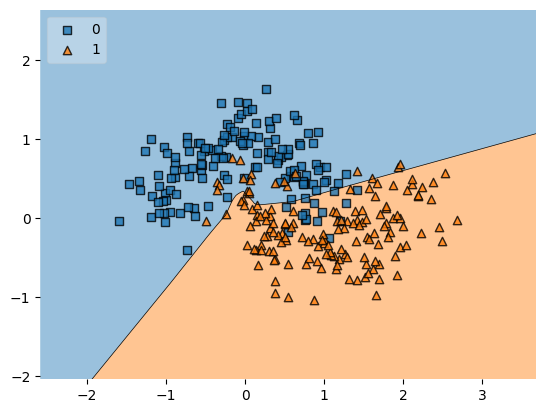

In [32]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)